<a href="https://colab.research.google.com/github/Monishsoni296/Data-Compression/blob/main/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

taking the packages

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt

taking data

In [5]:
covid = pd.read_csv("covid_19_data.csv")
covid.head(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [6]:
print("Size/Shape of the dataset",covid.shape)
print("Checking for null values",covid.isnull().sum())
print("checking Data-type",covid.dtypes)

Size/Shape of the dataset (18327, 8)
Checking for null values SNo                   0
ObservationDate       0
Province/State     9277
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64
checking Data-type SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


In [7]:
# dropping the column
covid.drop(["SNo"],1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [8]:
covid.isnull().sum()

ObservationDate       0
Province/State     9277
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [9]:
covid["ObservationDate"] = pd.to_datetime(covid["ObservationDate"])
covid["ObservationDate"]

0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
18322   2020-04-24
18323   2020-04-24
18324   2020-04-24
18325   2020-04-24
18326   2020-04-24
Name: ObservationDate, Length: 18327, dtype: datetime64[ns]

In [10]:
# Grouping different types of cases as per the date
datewise = covid.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})


In [11]:
# basic information
print("Basic Information")
print("Total number of Confirmed cases around the world",datewise["Confirmed"].iloc[-1])
print("Total number of Recovered cases around the world",datewise["Recovered"].iloc[-1])
print("Total number of Death cases around the world",datewise["Deaths"].iloc[-1])
print("Total number of Active cases around the world",datewise["Confirmed"].iloc[-1] - datewise["Recovered"].iloc[-1] - datewise["Deaths"].iloc[-1])
print("Total number of Closed cases around the world",datewise["Recovered"].iloc[-1] + datewise["Deaths"].iloc[-1])

Basic Information
Total number of Confirmed cases around the world 2811193.0
Total number of Recovered cases around the world 793601.0
Total number of Death cases around the world 197159.0
Total number of Active cases around the world 1820433.0
Total number of Closed cases around the world 990760.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text major ticklabel objects>)

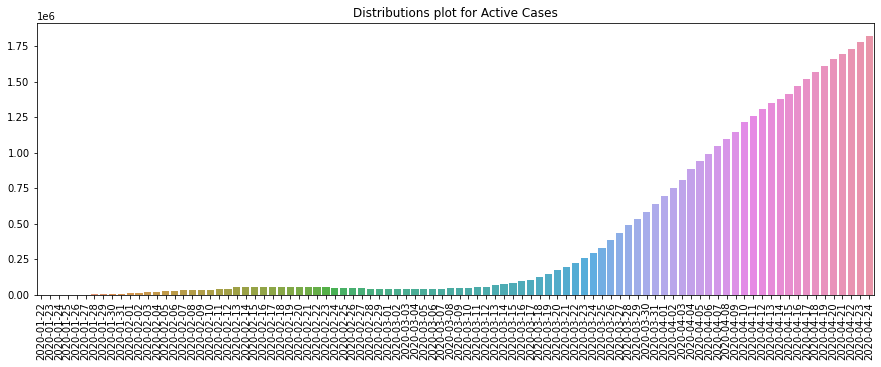

In [12]:
# Active Cases
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
plt.title("Distributions plot for Active Cases")
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text major ticklabel objects>)

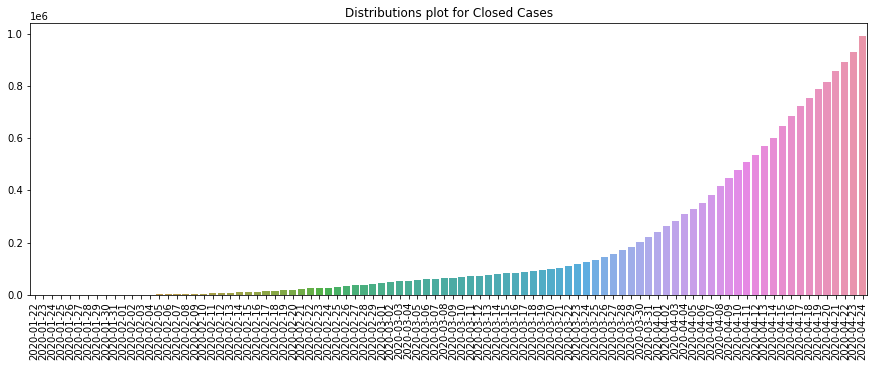

In [13]:
#Closed Cases
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Recovered"]+datewise["Deaths"])
plt.title("Distributions plot for Closed Cases")
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Weekly Progress of different types of cases')

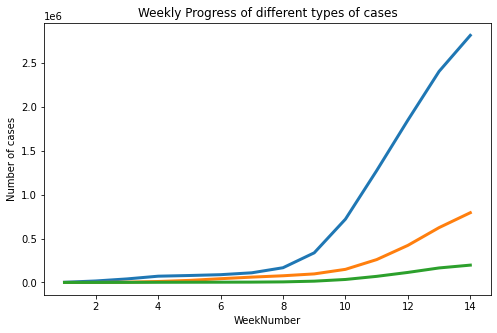

In [14]:
datewise["WeekofYear"] = datewise.index.weekofyear
week_num = []
weekwise_confirmed = []
weekwise_recovered = []
weekwise_deaths = []
w = 1
for i in list(datewise["WeekofYear"].unique()):
  weekwise_confirmed.append(datewise[datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
  weekwise_recovered.append(datewise[datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
  weekwise_deaths.append(datewise[datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
  week_num.append(w)
  w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3)
plt.plot(week_num,weekwise_recovered,linewidth=3)
plt.plot(week_num,weekwise_deaths,linewidth=3)
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases")

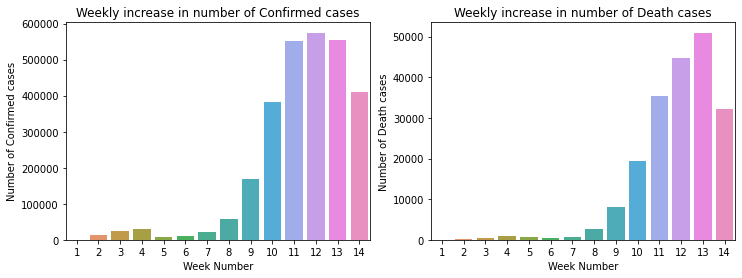

In [15]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
sns.barplot(x = week_num, y = pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x = week_num, y = pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Number of Confirmed cases")
ax2.set_ylabel("Number of Death cases")
ax1.set_title("Weekly increase in number of Confirmed cases")
ax2.set_title("Weekly increase in number of Death cases")
plt.show()


Average incerease in number of Confirmed cases everyday: 29900.0
Average incerease in number of Recovered cases everyday: 8442.0
Average incerease in number of Deaths cases everyday: 2097.0


(array([737456., 737470., 737485., 737499., 737516., 737530.]),
 <a list of 6 Text major ticklabel objects>)

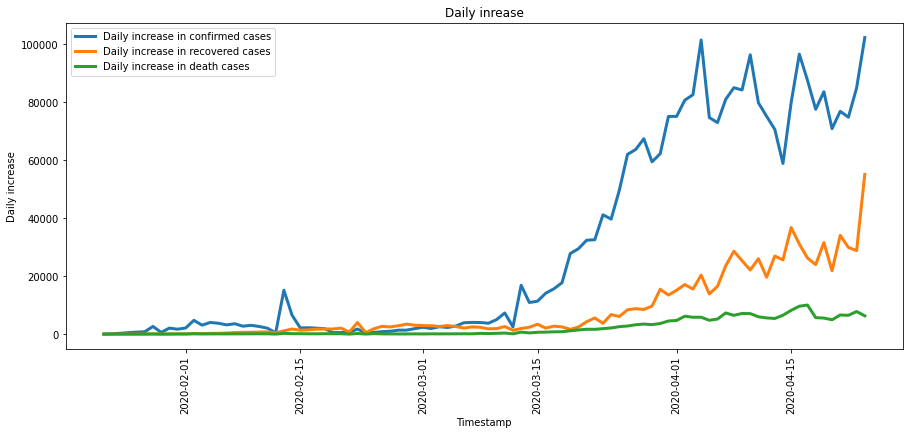

In [16]:
print("Average incerease in number of Confirmed cases everyday:", np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average incerease in number of Recovered cases everyday:", np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average incerease in number of Deaths cases everyday:", np.round(datewise["Deaths"].diff().fillna(0).mean()))
plt.figure(figsize=(15,6))
plt.plot(datewise["Confirmed"].diff().fillna(0), label="Daily increase in confirmed cases", linewidth=3)
plt.plot(datewise["Recovered"].diff().fillna(0), label="Daily increase in recovered cases", linewidth=3)
plt.plot(datewise["Deaths"].diff().fillna(0), label="Daily increase in death cases", linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily increase")
plt.title("Daily inrease")
plt.legend()
plt.xticks(rotation=90)

In [17]:
# Country wise analysis
# Calculating Country wise Mortality rate
countrywise = covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Recovered"])*100
countrywise["Recovered"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100


Text(0.5, 1.0, 'Top 15 countries as per number of death cases')

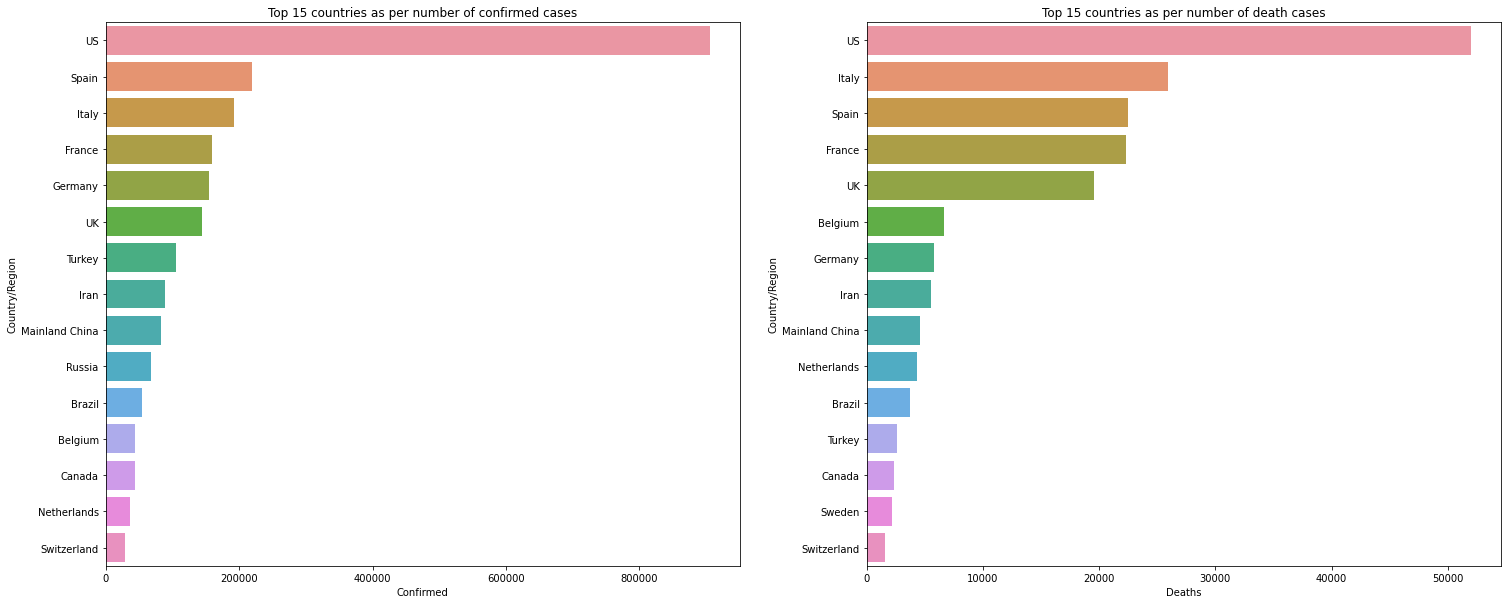

In [18]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(25,10))
top_15confirmed = countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15deaths = countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=top_15confirmed["Confirmed"],y=top_15confirmed.index,ax=ax1)
ax1.set_title("Top 15 countries as per number of confirmed cases")
sns.barplot(x=top_15deaths["Deaths"],y=top_15deaths.index,ax=ax2)
ax2.set_title("Top 15 countries as per number of death cases")


In [19]:
# Data Analysis for India
india_data = covid[covid["Country/Region"]=="India"]
datewise_india = india_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(datewise_india.iloc[-1])
print("Total Active Cases", datewise_india["Confirmed"].iloc[-1]-datewise_india["Recovered"].iloc[-1]-datewise_india["Deaths"].iloc[-1])
print("Total Closed Cases", datewise_india["Recovered"].iloc[-1]+datewise_india["Deaths"].iloc[-1])

Confirmed    24530.0
Recovered     5498.0
Deaths         780.0
Name: 2020-04-24 00:00:00, dtype: float64
Total Active Cases 18252.0
Total Closed Cases 6278.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Weekly Progress of different types of cases')

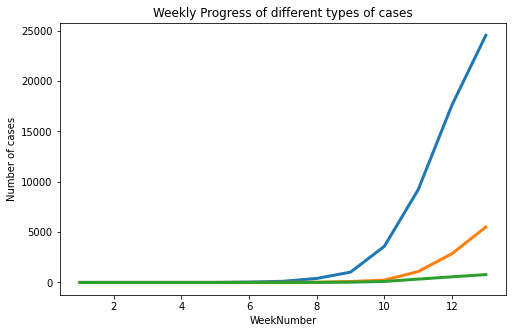

In [20]:
datewise_india["WeekofYear"] = datewise_india.index.weekofyear
week_num_india = []
india_weekwise_confirmed = []
india_weekwise_recovered = []
india_weekwise_deaths = []
w = 1
for i in list(datewise_india["WeekofYear"].unique()):
  india_weekwise_confirmed.append(datewise_india[datewise_india["WeekofYear"]==i]["Confirmed"].iloc[-1])
  india_weekwise_recovered.append(datewise_india[datewise_india["WeekofYear"]==i]["Recovered"].iloc[-1])
  india_weekwise_deaths.append(datewise_india[datewise_india["WeekofYear"]==i]["Deaths"].iloc[-1])
  week_num_india.append(w)
  w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num_india,india_weekwise_confirmed,linewidth=3)
plt.plot(week_num_india,india_weekwise_recovered,linewidth=3)
plt.plot(week_num_india,india_weekwise_deaths,linewidth=3)
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases")

In [21]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"]=datewise["Days Since"].dt.days
train_ml = datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml = datewise.iloc[:int(datewise.shape[0]*0.95)]
model_scores=[]

In [23]:
# initialize model and fit data
# c = lost parameter, deg = no. of features
lin_reg = LinearRegression(normalize=True)
svm = SVR(C=1,degree=5,kernel='poly',epsilon=0.001)
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1, degree=5, epsilon=0.001, kernel='poly')

In [ ]:
# prediction part
prediction_valid_lin_reg = lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
prediction_valid_svm = svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))


In [27]:
new_date = []
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,18):
  new_date.append(datewise.index[-1]+timedelta(days=i))
  new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
  new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format", lambda x: '%.f' % x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns = ["Dates","LR","SVR"])
model_predictions.head(5)

,Dates,LR,SVR
0,2020-04-25,1560529,3322586
1,2020-04-26,1582219,3500761
2,2020-04-27,1603909,3686599
3,2020-04-28,1625599,3880344
4,2020-04-29,1647289,4082245


In [31]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.85)]
valid=datewise.iloc[int(datewise.shape[0]*0.85):]


In [33]:
holt=Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=1.4,smoothing_slope=0.2)
y_pred = valid.copy()
y_pred["Holt"]=holt.forecast(len(valid))


In [36]:
holt_new_date=[]
holt_new_prediction=[]
for i in range(1,18):
  holt_new_date.append(datewise.index[-1]+timedelta(days=i))
  holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])
model_predictions["Holts Linear Model Prediction"]=holt_new_prediction
model_predictions.head(5)

,Dates,LR,SVR,Holts Linear Model Prediction
0,2020-04-25,1560529,3322586,2855246
1,2020-04-26,1582219,3500761,2933902
2,2020-04-27,1603909,3686599,3012558
3,2020-04-28,1625599,3880344,3091214
4,2020-04-29,1647289,4082245,3169870
